<a href="https://colab.research.google.com/github/rashmi1112/Tensorflow-for-AI-ML-and-DL/blob/main/Exercise2_HandwritingRecognition_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Training label: 3
Training image array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   

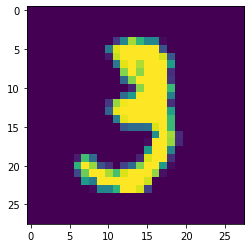

In [6]:
import matplotlib.pyplot as plt
import numpy as np

idx = 10
np.set_printoptions(linewidth = 320)

print(f'Training label: {y_train[idx]}')
print(f'Training image array: {x_train[idx]}')

plt.imshow(x_train[idx])

In [12]:
## Classback class inherits from tf.Keras.callbacks.Callback

class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):
    if logs.get('accuracy') >= 0.99:
      print('Reached the desired accuracy, so stopped the training!')
      self.model.stop_training = True
  
cb = mycallback()


In [16]:
model = tf.keras.Sequential([keras.layers.Flatten(),
                             keras.layers.Dense(units=1024, activation = tf.nn.relu),
                             keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 10, callbacks = [cb])

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.1345 - accuracy: 0.8492
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2545 - accuracy: 0.9345
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1873 - accuracy: 0.9521
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1477 - accuracy: 0.9619
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1349 - accuracy: 0.9665
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1168 - accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1024 - accuracy: 0.9755
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1046 - accuracy: 0.9758
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0873 - accuracy: 0.9797
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1317 - accuracy: 0.9760


[0.13168703019618988, 0.9760000109672546]